In [166]:
#Stock Price Prediction And Forecasting Using Stacked LSTM- Deep Learning
# https://www.youtube.com/watch?v=H6du_pfuznE

In [167]:
import pandas_datareader as pdr
#using tiingo library
key="08b78fbc98302e995956e2d3b5b8f3c0296d32cc"

I choose these companies because I know them or I read news about them. 
There are no particular reasons

In [168]:
#AAPL  = Apple
stock = #"ADBE"#"AAPL"#TDS"#"CLVT"#"RPRX"#"T"#"PHUN"#"ARDX"#"HPQ"#"CLVT"#"LGIH"#"FB"#"ORCL"#"MSFT"#"TDS"#"AMD"#"TM"#"DELL"#"COST"#"ABC"#"ABBV"
df = pdr.get_data_tiingo(stock, api_key=key)

In [169]:
df.to_csv(f'{stock}.csv')

In [170]:
import pandas as pd
df = pd.read_csv(f'{stock}.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,ADBE,2016-12-05 00:00:00+00:00,101.95,102.52,100.16,100.46,2319383,101.95,102.52,100.16,100.46,2319383,0.0,1.0
1,ADBE,2016-12-06 00:00:00+00:00,101.55,101.99,100.71,101.99,2679915,101.55,101.99,100.71,101.99,2679915,0.0,1.0
2,ADBE,2016-12-07 00:00:00+00:00,103.36,103.51,100.89,100.89,2728942,103.36,103.51,100.89,100.89,2728942,0.0,1.0
3,ADBE,2016-12-08 00:00:00+00:00,103.50,104.07,102.54,103.36,1852118,103.50,104.07,102.54,103.36,1852118,0.0,1.0
4,ADBE,2016-12-09 00:00:00+00:00,104.31,104.50,103.42,104.00,2620553,104.31,104.50,103.42,104.00,2620553,0.0,1.0


In [171]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,ADBE,2021-11-26 00:00:00+00:00,662.10,683.9999,659.68,670.2529,2203960,662.10,683.9999,659.68,670.2529,2203960,0.0,1.0
1254,ADBE,2021-11-29 00:00:00+00:00,687.49,691.3600,665.77,668.0000,2728844,687.49,691.3600,665.77,668.0000,2728844,0.0,1.0
1255,ADBE,2021-11-30 00:00:00+00:00,669.85,694.8900,667.83,687.2200,4703616,669.85,694.8900,667.83,687.2200,4703616,0.0,1.0
1256,ADBE,2021-12-01 00:00:00+00:00,657.41,678.7800,656.28,676.0000,2832765,657.41,678.7800,656.28,676.0000,2832765,0.0,1.0
1257,ADBE,2021-12-02 00:00:00+00:00,671.88,674.8450,653.62,655.9500,2675408,671.88,674.8450,653.62,655.9500,2675408,0.0,1.0


In [172]:
#value to predict
df_closePrice = df.reset_index()['close']

In [173]:
df_closePrice.shape

(1258,)

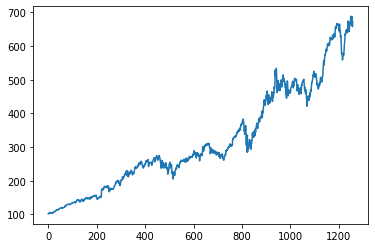

In [174]:
import matplotlib.pyplot as plt
plt.plot(df_closePrice)

In [175]:
#LSTM is sensitive to the scale 
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# use MinMax scalar to transform the value between 0 and 1
scaler=MinMaxScaler(feature_range=(0,1))
df_closePrice=scaler.fit_transform(np.array(df_closePrice).reshape(-1,1))



In [176]:
#converted to array of values between 0 and 1 
df_closePrice 

array([[6.81640026e-04],
       [0.00000000e+00],
       [3.08442112e-03],
       ...,
       [9.68440067e-01],
       [9.47241062e-01],
       [9.71899390e-01]])

In [177]:
# make train test split
split_percentage = 0.65
training_size = int(len(df_closePrice)*split_percentage)
test_size=len(df_closePrice)-training_size
#split the dataframe
train_data = df_closePrice[0:training_size,:]
test_data = df_closePrice[training_size:len(df_closePrice),:1]

print(len(train_data))
print(len(test_data))

817
441


In [178]:

# This method is use to separate the data in the order of its timeline
	#for example, 
	#Train: 1, 2, 4, 1, 5, 6 
	#will return 1, 2, 4, 1 (train_x); 5, 6 (train_y)
#This will preserve the time in the model,
#so we cannot use the future to predict the past
def create_dataset(dataset, time_step=1):
	x, y = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		x.append(a)
		y.append(dataset[i + time_step, 0])
	return np.array(x), np.array(y)

In [179]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100 #more the better; train test split
train_x, train_y = create_dataset(train_data, time_step)
test_x, test_y = create_dataset(test_data, time_step)

In [180]:
print(train_x)

[[0.00068164 0.         0.00308442 ... 0.05323609 0.05424151 0.05485498]
 [0.         0.00308442 0.003323   ... 0.05424151 0.05485498 0.0571896 ]
 [0.00308442 0.003323   0.00470332 ... 0.05485498 0.0571896  0.05700215]
 ...
 [0.29881395 0.28847006 0.29433216 ... 0.42566716 0.40211649 0.41506765]
 [0.28847006 0.29433216 0.29554207 ... 0.40211649 0.41506765 0.44090181]
 [0.29433216 0.29554207 0.30118265 ... 0.41506765 0.44090181 0.42055485]]


In [181]:
print(train_x.shape), print(train_y.shape)
print(test_x.shape), print(test_y.shape)

(716, 100)
(716,)
(340, 100)
(340,)


(None, None)

In [182]:
#reshape input 
train_x =train_x.reshape(train_x.shape[0],train_x.shape[1] , 1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1] , 1)

In [183]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [184]:
#Creating nested LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [185]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [186]:
#model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=100,batch_size=64,verbose=1)
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10,batch_size=64,verbose=1)


Epoch 1/10
12/12 [==============================] - 9s 400ms/step - loss: 0.0160 - val_loss: 0.1075
Epoch 2/10
12/12 [==============================] - 3s 245ms/step - loss: 0.0034 - val_loss: 0.0206
Epoch 3/10
12/12 [==============================] - 3s 217ms/step - loss: 0.0014 - val_loss: 0.0213
Epoch 4/10
12/12 [==============================] - 3s 214ms/step - loss: 6.4803e-04 - val_loss: 0.0138
Epoch 5/10
12/12 [==============================] - 3s 211ms/step - loss: 5.0039e-04 - val_loss: 0.0071
Epoch 6/10
12/12 [==============================] - 3s 215ms/step - loss: 3.8088e-04 - val_loss: 0.0053
Epoch 7/10
12/12 [==============================] - 3s 225ms/step - loss: 3.2634e-04 - val_loss: 0.0050
Epoch 8/10
12/12 [==============================] - 3s 217ms/step - loss: 3.2140e-04 - val_loss: 0.0040
Epoch 9/10
12/12 [==============================] - 3s 229ms/step - loss: 3.4390e-04 - val_loss: 0.0037
Epoch 10/10
12/12 [==============================] - 3s 210ms/step - loss: 3

In [187]:
import tensorflow as tf

train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

In [188]:
#Transform back to original data range
#from (0,1) back to original range

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [189]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

#result for training dataset
math.sqrt(mean_squared_error(train_y,train_predict))


244.700682330113

In [190]:
### Test Data RMSE
math.sqrt(mean_squared_error(test_y,test_predict))

509.46685393869745

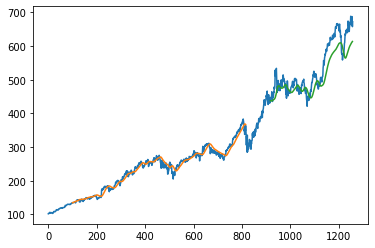

In [191]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df_closePrice)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_closePrice)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_closePrice)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_closePrice))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#test predict is green
#blue is the whole data set
#orange is the train predict

In [192]:
#prediction

start_point = len(test_data) -100
#use 100 data poin to predict
x_input=test_data[start_point:].reshape(1,-1)
x_input.shape



(1, 100)

In [193]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist() #all the test_data with previous 100 data point

In [194]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #if more than 100 data point shift the list to contain only 100 datapoint

        #print(temp_input)
        x_input=np.array(temp_input[1:]) #shifting one poistion to the right
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        y_pred = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,y_pred))
        temp_input.extend(y_pred[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(y_pred.tolist())
        i=i+1
    else:
        #use the 100 data point to predict
        x_input = x_input.reshape((1, n_steps,1)) #reshape the data
        y_pred = model.predict(x_input, verbose=0)
        print(y_pred[0])
        temp_input.extend(y_pred[0].tolist())
        print(len(temp_input))

        #add to the temp_input
        lst_output.extend(y_pred.tolist()) 
        i=i+1
    

#print(lst_output)

[0.8749253]
101
1 day input [0.85992297 0.85980369 0.85290208 0.86426843 0.87030094 0.88976177
 0.89349375 0.88485396 0.88055963 0.88505845 0.88638765 0.88626836
 0.88136055 0.88567193 0.89316997 0.90407621 0.90288334 0.89920248
 0.88645581 0.8937664  0.90794451 0.91298865 0.91235813 0.90906922
 0.89502744 0.91358509 0.93008077 0.94630381 0.94695136 0.94620156
 0.93868648 0.94913261 0.96186224 0.95795985 0.96169183 0.95956171
 0.9628847  0.95402338 0.95714188 0.95451757 0.94984834 0.9263488
 0.92611022 0.95349511 0.96036263 0.94224805 0.91977097 0.92760983
 0.89385161 0.90196312 0.88810879 0.85562864 0.81323063 0.81140725
 0.80803313 0.8110153  0.77867148 0.79266215 0.79881395 0.81355441
 0.8099758  0.80351726 0.81650251 0.83427627 0.86220647 0.86660305
 0.88831328 0.91087557 0.9045704  0.91528919 0.92367336 0.92945026
 0.92183293 0.91770901 0.91634573 0.93522716 0.9179135  0.91825432
 0.94344092 0.97564841 0.95628983 0.96191336 0.96515115 0.93035343
 0.92297468 0.94756484 0.95119457 0

In [195]:
#start plotting the new 30 predictions
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

Text(0.5, 1.0, 'ADBE')

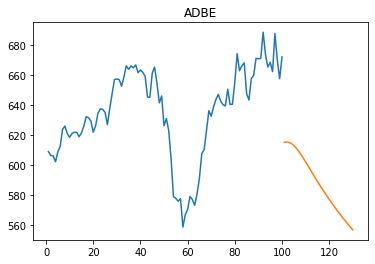

In [196]:
total_start = len(df_closePrice) - 100

plt.plot(day_new,scaler.inverse_transform(df_closePrice[total_start:])) #use the previous 100 data
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title(stock)

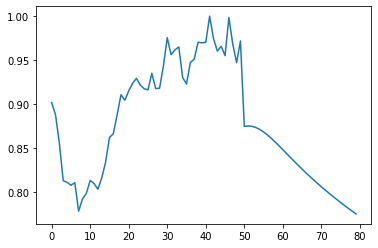

In [197]:
#combine to the whole data
df3=df_closePrice.tolist()
df3.extend(lst_output)
view_point = len(df_closePrice)-50
plt.plot(df3[view_point:])

In [198]:
#Future plan
#try 150 data point 
#try predict next 100 days
#use binary LSTM